In [1]:
import pandas as pd

In [15]:
def download_data(year) -> pd.DataFrame:
    url = f"https://marketnews.usda.gov/mnp/py-report?&repDate=01%2F01%2F{year}&regionsDesc=&endDate=12%2F31%2F{year}&repMonth=1&run=Run&_producttypefrom=1&endYear=2023&producttypefrom=&repYear=2020&categoryDesc=Egg&frequency=Daily&datatype=None+Selected&previouscls=Breaking+Stock&_producttype=1&report=NW_PY041&category=Egg&subcategory=Breaking+Stock&endMonth=1&commodityDesc=Breaking+Stock&runReport=true&format=excel"
    return pd.read_html(url)[0]

In [16]:
def get_data(years: list) -> pd.DataFrame:
    dfs = [download_data(year) for year in years]
    return pd.concat(dfs)

In [32]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
df = get_data(years)

In [33]:
df.head()

,Date,Region,Egg Class,Market Name,Delivery Name,Price Unit,Low Price,High Price,Mostly Low,Mostly High
0,01/02/2018,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,60.0,68,63.0,68.0
1,01/02/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,77.0,78,NaN,NaN
2,01/03/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,75.0,76,NaN,NaN
3,01/03/2018,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,58.0,66,61.0,66.0
4,01/04/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,72.0,73,NaN,NaN


In [34]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [35]:
df.head()

,Region,Egg Class,Market Name,Delivery Name,Price Unit,Low Price,High Price,Mostly Low,Mostly High
Date,,,,,,,,,
2018-01-02,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,60.0,68,63.0,68.0
2018-01-02,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,77.0,78,NaN,NaN
2018-01-03,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,75.0,76,NaN,NaN
2018-01-03,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,58.0,66,61.0,66.0
2018-01-04,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,72.0,73,NaN,NaN


## 2. What was the average low price for eggs in each of the years of data?

In [36]:
df.groupby(df.index.year).mean()

/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_73539/2649865487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.index.year).mean()


,Low Price,High Price,Mostly Low,Mostly High
Date,,,,
2018,59.083333,65.644578,55.325581,60.049834
2019,27.268000,32.858000,23.220896,27.244776
2020,32.950199,38.507968,30.973134,35.364179
2021,49.072000,54.326000,45.901587,49.949206
2022,188.148000,199.242000,183.421642,186.123134
2023,125.050532,140.428191,126.954128,129.692661


/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_73539/2420549494.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.index.year).mean().plot(kind="bar")


<AxesSubplot: xlabel='Date'>

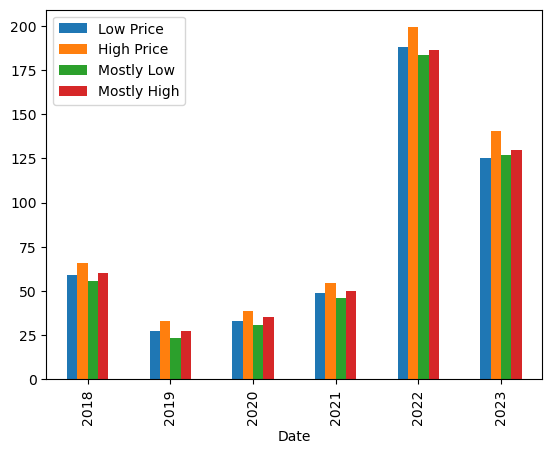

In [37]:
df.groupby(df.index.year).mean().plot(kind="bar")

## 3. In what year was the increase the greatest?

In [45]:
df.groupby(df.index.year).mean().pct_change()

/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_73539/4053604496.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.index.year).mean().pct_change()


,Low Price,High Price,Mostly Low,Mostly High
Date,,,,
2018,NaN,NaN,NaN,NaN
2019,-0.538482,-0.499456,-0.580286,-0.546297
2020,0.208383,0.171951,0.333848,0.298017
2021,0.489278,0.410773,0.481981,0.412424
2022,2.834121,2.667526,2.995976,2.726248
2023,-0.335361,-0.295188,-0.307856,-0.303189


## 4. Now get the average low price for eggs in each month and year of data.

In [39]:
df.groupby([df.index.year, df.index.month]).mean()

/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_73539/2621821602.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby([df.index.year, df.index.month]).mean()


Low Price  High Price  Mostly Low  Mostly High
Date Date                                                 
2018 1      54.190476   61.642857   51.090909    55.954545
     2      68.000000   74.078947   63.315789    68.315789
     3     104.068182  110.500000   99.000000   104.083333
     4      78.785714   86.880952   75.586207    80.034483
     5      56.522727   61.863636   50.136364    55.136364
...               ...         ...         ...          ...
2023 5      36.931818   45.363636   33.086957    35.260870
     6      66.190476   75.595238   66.807692    68.923077
     7      77.875000   87.450000   76.866667    80.466667
     8      78.500000   86.652174   74.217391    76.217391
     9      78.175000   90.050000   75.800000    77.800000

[69 rows x 4 columns]

## 5. Have egg prices gone down in the last few months?

/var/folders/x_/pp_bgvrn2qn_kh8n569y1gch0000gn/T/ipykernel_73539/919209415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.loc["2023"].groupby(df.loc["2023"].index.month).mean().plot(kind="line")


<AxesSubplot: xlabel='Date'>

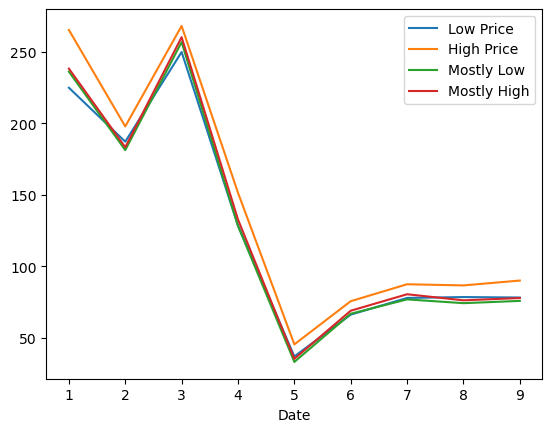

In [42]:
df.loc["2023"].groupby(df.loc["2023"].index.month).mean().plot(kind="line")